# Template Notebook

## Setup

### Standard library imports

In [2]:
%load_ext autoreload

In [3]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [123]:
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, triang, ks_2samp
from matplotlib import pyplot as plt

### Modules importsks_2samp

In [227]:
%autoreload 2

from source.functions.distributions import cauchy, exponential, laplace, logistic, triangle
from source.functions.cumulative import cumulative_cauchy, cumulative_exponential, cumulative_laplace, cumulative_logistic, cumulative_triangle
from source.functions.inverse import inverse_cauchy, inverse_exponential, inverse_laplace, inverse_logistic, inverse_triangle
from source.generators.inverted_distribution import cumulative_distribution_function, _sample_analytic_distribution

### Triangle distribution 

In [52]:
t = np.linspace(-1.5, 1.5, 10_000)

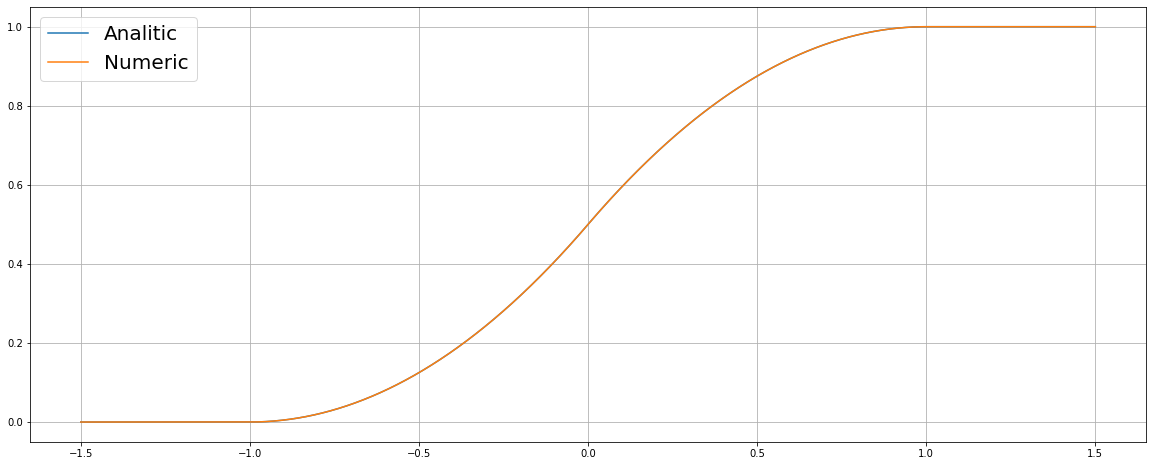

In [53]:
plt.figure(figsize=[20, 8])

plt.plot(t, np.array([cumulative_triangle(point) for point in t]))
plt.plot(t, np.array([cumulative_distribution_function(triangle, point) for point in t]))

plt.legend(['Analitic', 'Numeric'], prop={'size': 20})

plt.grid()

plt.savefig(r'../images/distributions/triangle/cdf.png')

In [56]:
print(f"Abs difference: {np.sum(np.array([cumulative_triangle(point) for point in t]) - np.array([cumulative_distribution_function(triangle, point) for point in t]))}")

Abs difference: 0.00014885377673620347


In [98]:
triangle_dist = _sample_analytic_distribution(10_000, distribution='triangle')

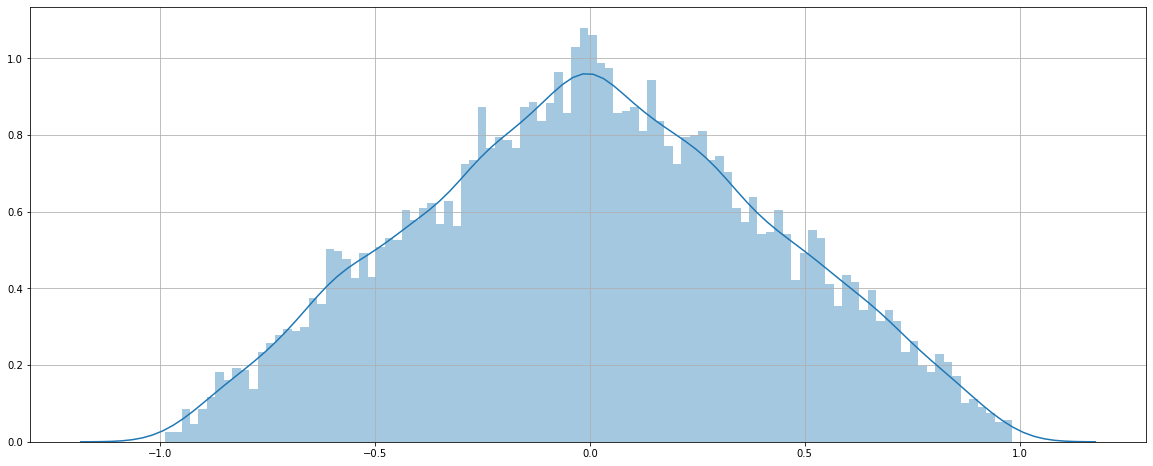

In [99]:
plt.figure(figsize=[20, 8])

sns.distplot(triangle_dist, bins=100)

plt.grid()

plt.savefig(r'../images/distributions/triangle/traingle_distplot.png')

In [100]:
ks_2samp(triangle_dist, np.random.triangular(-1.0, 0.0, 1.0, size=10_000))

Ks_2sampResult(statistic=0.0066, pvalue=0.9813865022115018)

### Exponential distribution

In [119]:
exp_dist = _sample_analytic_distribution(10_000, distribution='exponential', sample_range=(-1, 0))

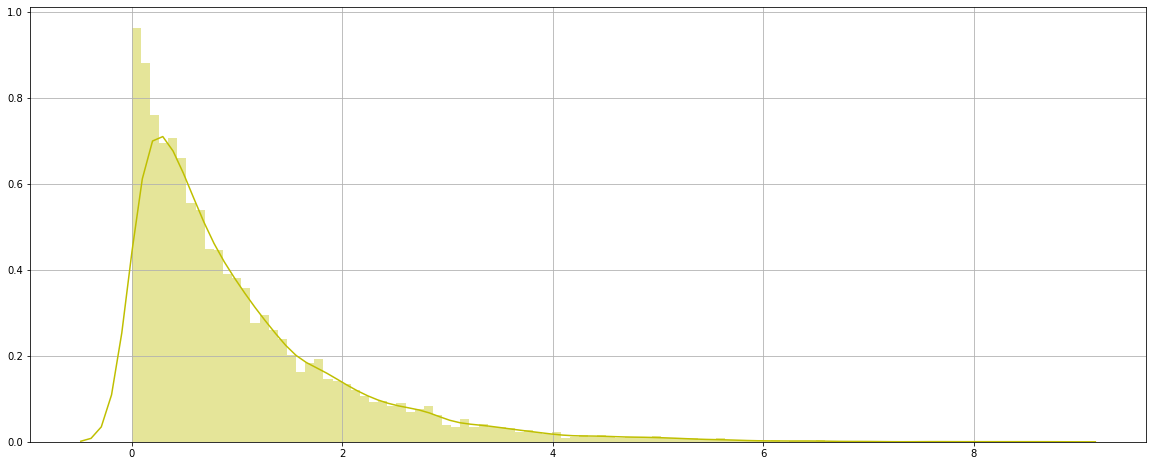

In [124]:
plt.figure(figsize=[20, 8])

sns.distplot(exp_dist, bins=100, color='y')

plt.grid()

plt.savefig(r'../images/distributions/triangle/exponential_distplot.png')

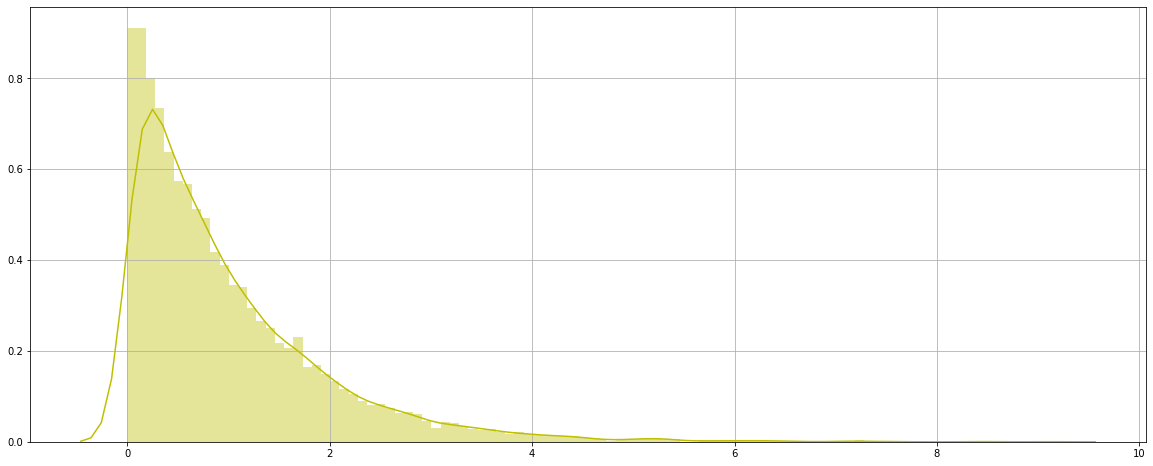

In [144]:
plt.figure(figsize=[20, 8])

sns.distplot(stats.expon.rvs(size=10_000), bins=100, color='y')

plt.grid()

In [143]:
ks_2samp(exp_dist, stats.expon.rvs(size=10_000))

Ks_2sampResult(statistic=0.0068, pvalue=0.9749119230771707)

### Cauchy distribution

In [174]:
cauchy_dist = _sample_analytic_distribution(10_000, distribution='cauchy', sample_range=(0, 1))

In [209]:
plotted = np.where(np.logical_and(cauchy_dist >= -3, cauchy_dist <= 3))

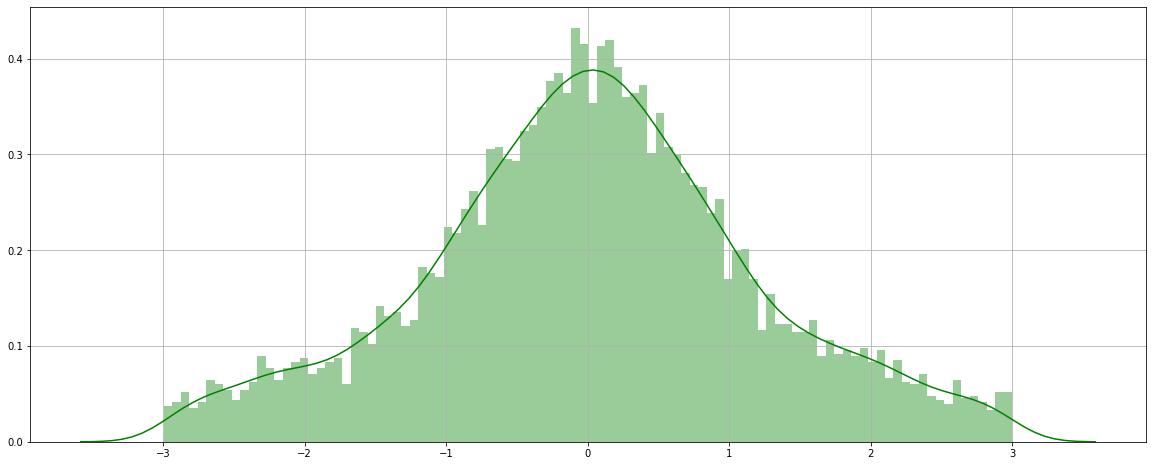

In [201]:
plt.figure(figsize=[20, 8])

sns.distplot(cauchy_dist[plotted], bins=100, color='g')

plt.grid()

plt.savefig(r'../images/distributions/triangle/cauchy_distplot.png')

In [215]:
generated_cauchy = _sample_analytic_distribution(10_000, distribution='cauchy', sample_range=(0, 1))
benchmark_cauchy = stats.cauchy.rvs(size=10_000)
sample_range = (-1000, 1000)

valid_generated = np.logical_and(generated_cauchy >= sample_range[0], generated_cauchy <= sample_range[1])
valid_banchmark = np.logical_and(benchmark_cauchy >= sample_range[0], benchmark_cauchy <= sample_range[1])

ks_2samp(generated_cauchy[valid_generated], benchmark_cauchy[valid_banchmark])

Ks_2sampResult(statistic=0.1203138747241465, pvalue=1.0)

In [223]:
ks_2samp(generated_cauchy, benchmark_cauchy)

Ks_2sampResult(statistic=0.1203, pvalue=1.996291515373941e-63)

In [222]:
print(f"Max: {generated_cauchy.max():.0f} Min: {generated_cauchy.min():.0f}")

Max: 2693 Min: -2305


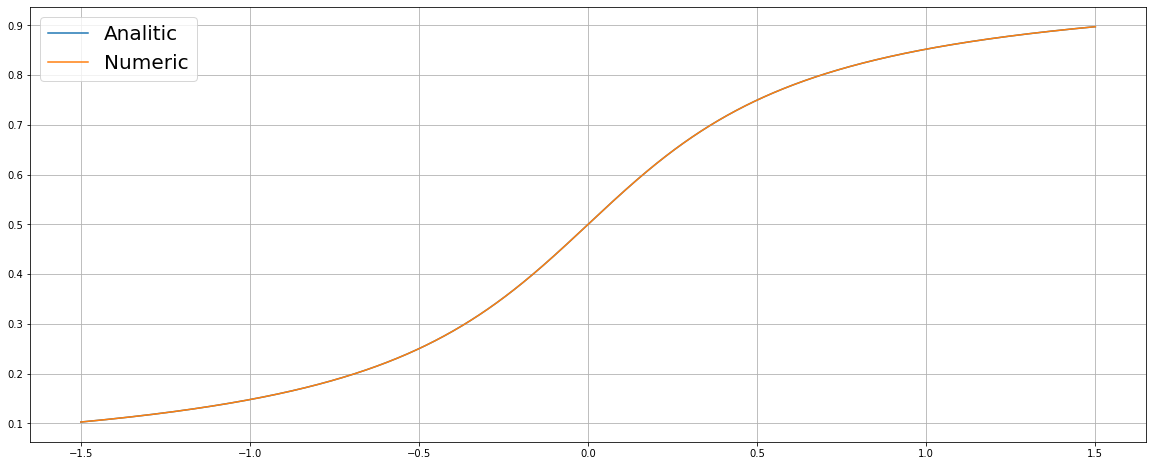

In [238]:
plt.figure(figsize=[20, 8])

plt.plot(t, cumulative_cauchy(t))
plt.plot(t, np.array([cumulative_distribution_function(cauchy, point) for point in t]))

plt.legend(['Analitic', 'Numeric'], prop={'size': 20})

plt.grid()
plt.savefig('../images/distributions/triangle/cauchy_cdf.png', bbox='tight')

In [239]:
print(f"Abs difference: {np.abs(np.sum(np.array([cumulative_triangle(point) for point in t]) - np.array([cumulative_distribution_function(triangle, point) for point in t])))}")

Abs difference: 0.00014885377673620347


### Laplace Distribution

In [230]:
laplace_dist = _sample_analytic_distribution(10_000, distribution='laplace', sample_range=(0, 1))

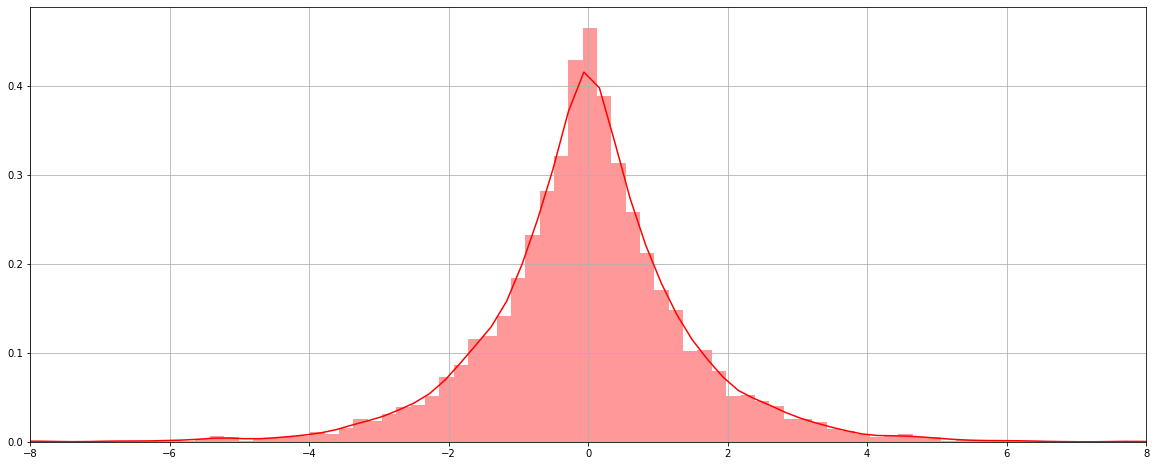

In [235]:
plt.figure(figsize=[20, 8])

sns.distplot(laplace_dist, bins=100, color='r')

plt.xlim([-8, 8])
plt.grid()

plt.savefig(r'../images/distributions/triangle/laplace_distplot.png')

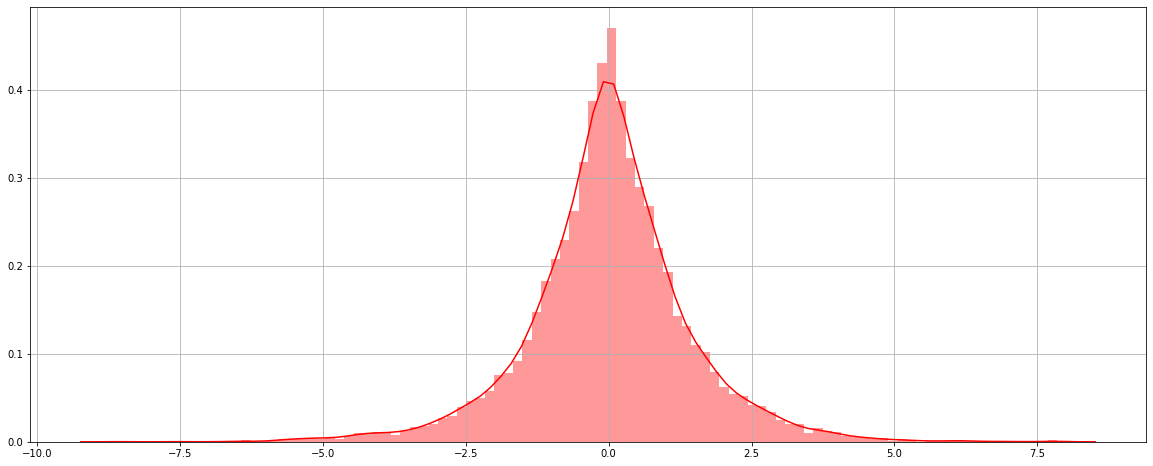

In [226]:
plt.figure(figsize=[20, 8])

sns.distplot(stats.laplace.rvs(size=10_000), bins=100, color='r')

plt.grid()

In [240]:
ks_2samp(laplace_dist, stats.laplace.rvs(size=10_000))

Ks_2sampResult(statistic=0.0071, pvalue=0.9626361027684857)

In [241]:
logistic_dist = _sample_analytic_distribution(10_000, distribution='logistic', sample_range=(0, 1))

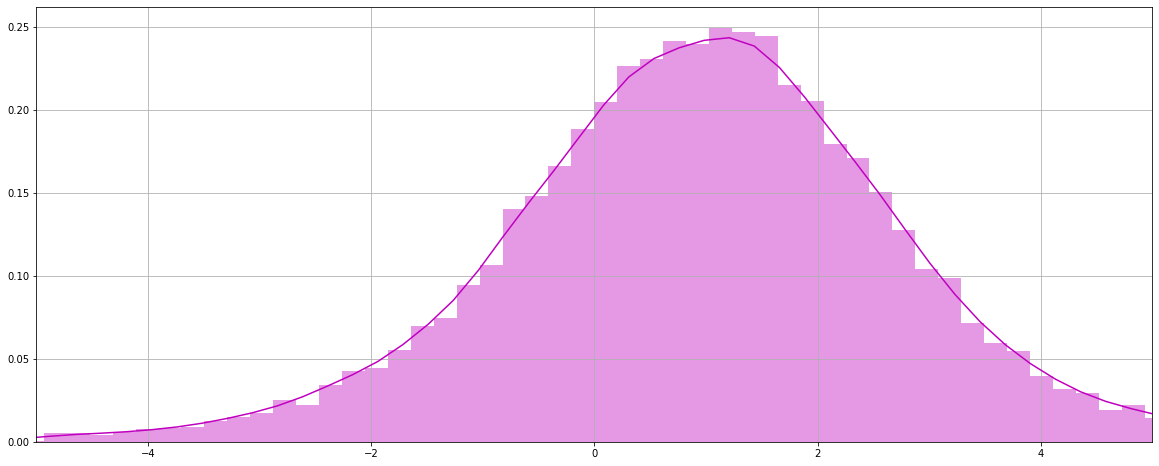

In [248]:
plt.figure(figsize=[20, 8])

sns.distplot(logistic_dist, bins=100, color='m')

plt.xlim([-5, 5])
plt.grid()

plt.savefig(r'../images/distributions/triangle/logistic_distplot.png')

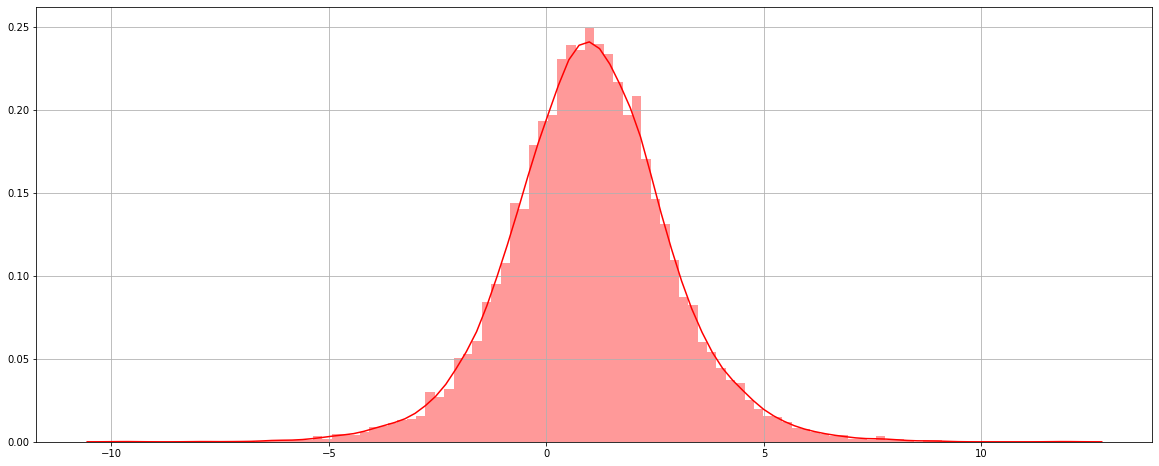

In [251]:
plt.figure(figsize=[20, 8])

log_dist = stats.logistic(loc=1.0)
sns.distplot(log_dist.rvs(size=10_000), bins=100, color='r')

plt.grid()

In [257]:
ks_2samp(logistic_dist, log_dist.rvs(size=10_000))

Ks_2sampResult(statistic=0.0075, pvalue=0.9411994973047206)